Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **44 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Simon Andren"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomized quicksort

## Part A. Median-of-3 partitioning quicksort 

## Question 1 [time estimate: 10 minutes]

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [2]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3):
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def randomized_quicksort():
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)


def test_quicksort():
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.05873146100202575


## Question 2 [time estimate: 3 minutes]

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

In the quicksort algorithm provided by Cormen, the quicksort function was called recursivly on each subarray until it was of size 1 or 0. This creates a lot of space complexity which is a problem as python has a maximum recuursive calls that it can handles. 

In the provided code, this is not the case as the function is called once but includes an iterative process.

## Question 3 [time estimate: 10 minutes]

What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

In [3]:
import time
import random
import matplotlib.pyplot as plt

eps = 1e-16
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3):
    """Finds the median of unique values"""
    if (x1 < x2 < x3) or (x3 < x2 < x1): #Checks if x2 is the second larest/second smallest value
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3 #Checks for x3
    else: #if not x3 or x2, it's x1 that is the median
        return x1

def qsort(lst, N):
    indices = [(0, len(lst))] #Creates a list holding tuples of the first and last index of a subarray

    while indices: #While there are unsorted subarrays 
        (frm, to) = indices.pop() #last tuple with the indexes to sort between
        if frm == to: #if the subarray list is just 1 element
            continue

        # Find the partition:
        N = to - frm #Finds the number of elements in the list
        inds = [frm + int(N * n) for n in locations] #finds the index for the first, middle, and last element in the list
        values = [lst[ind] for ind in inds] #finds the values for the indexes 
        partition = median(*values) #Finds the median value of the three choosen values 

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] #Finds all the values smaller than the partition value
        upper = [a for a in lst[frm:to] if a > partition] #Finds all the values bigger than the partition value
        counts = sum([1 for a in lst[frm:to] if a == partition]) #Finds the many times the partition value appeats

        ind1 = frm + len(lower) #finds the index for the last element in the lower subarray 
        ind2 = ind1 + counts #Finds the index for the first element in the upper subarray

        # Push back into correct place:
        lst[frm:ind1] = lower #Inserts the lower subarray
        lst[ind1:ind2] = [partition] * counts #inserts all the dublicated partition values
        lst[ind2:to] = upper #inserts the upper subarray

        # Enqueue other locations
        indices.append((frm, ind1)) #appends the indexes for the less subarray
        indices.append((ind2, to)) #appends the indexes for the greater subarray
    return lst


def randomized_quicksort(N):
    """This function creates a list of N distincs integers in random order
    , and then sorts it usingg quick sort
    """
    lst = [i for i in range(N)] #list of N distincs integers
    random.shuffle(lst) #shuffles the list
    return qsort(lst, N) #sorts is using quicksort

def plot_run_time():
    time_list = []
    N_list = []
    for a in range(1,1001, 10):
       
        str_time = time.time()
        N = 100*a
        
        randomized_quicksort(N)
        
        time_list.append(time.time()-str_time)
        N_list.append(N)
    
    plt.plot(N_list, time_list)
    plt.xlabel('input size')
    plt.ylabel('runtime (s)')
    plt.title('Runtime for random quicksort')
    plt.show()

plot_run_time()
    



<Figure size 640x480 with 1 Axes>

I would have guessed that the time_complexity would be nLog(n) but it appears to more close to just n since the graph
is very linear

## Question 4.

### Question 4a [time estimate: 7 minutes]

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [4]:
def qsort_without_part(lst, N):
    indices = [(0, len(lst))] #Creates a list holding tuples of the first and last index of a subarray

    while indices: #While there are unsorted subarrays 
        (frm, to) = indices.pop() #last tuple with the indexes to sort between
        if frm == to: #if the subarray list is just 1 element
            continue

        # Find the partition:
        N = to - frm #Finds the number of elements in the list
        inds = [frm + int(N * n) for n in locations] #finds the index for the first, middle, and last element in the list
        values = [lst[ind] for ind in inds] #finds the values for the indexes 
        partition = median(*values) #Finds the median value of the three choosen values 

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] #Finds all the values smaller than the partition value
        upper = [a for a in lst[frm:to] if a > partition] #Finds all the values bigger than the partition value

        ind1 = frm + len(lower) #finds the index for the last element in the lower subarray 

        # Push back into correct place:
        lst[frm:ind1] = lower #Inserts the lower subarray
        print(lst)
        lst[ind1:ind1+1] = [partition]
        print(lst)
        lst[ind1+1:to+1] = upper #inserts the upper subarray
        print(lst)

        # Enqueue other locations
        indices.append((frm, ind1)) #appends the indexes for the less subarray
        indices.append((ind1+1, to)) #appends the indexes for the morer subarray
    return lst

qsort_without_part([4,2,1,5],4)


#I could not figure out how do this part. I don't understand why it removes the median from the list

[2, 1, 1, 5]
[2, 1, 4, 5]
[2, 1, 4, 5]
[2, 1, 4, 5]
[2, 1, 4, 5]
[2, 1, 4, 5]
[1, 1, 4, 5]
[1, 2, 4, 5]
[1, 2, 5]
[1, 2, 5]
[1, 2, 5]
[1, 5]


[1, 5]

In [ ]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b [time estimate: 3 minutes]

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Question 5.

### Question 5a [time estimate: 3 minutes]

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [ ]:
#Please find code below

In [ ]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b [time estimate: 3 minutes]

Does this change the running time of your algorithm? Justify your response with a graph. 



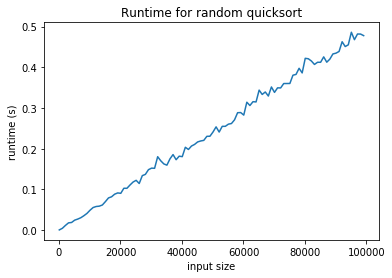

In [6]:
import time
import random
import matplotlib.pyplot as plt

eps = 1e-16
locations = [0.0, 0.5, 1.0 - eps]

def qsort(lst, N):
    indices = [(0, len(lst))] #Creates a list holding tuples of the first and last index of a subarray

    while indices: #While there are unsorted subarrays 
        (frm, to) = indices.pop() #last tuple with the indexes to sort between
        if frm == to: #if the subarray list is just 1 element
            continue

        # Find the partition:
        partition = lst[frm]

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] #Finds all the values smaller than the partition value
        upper = [a for a in lst[frm:to] if a > partition] #Finds all the values bigger than the partition value
        counts = sum([1 for a in lst[frm:to] if a == partition]) #Finds the many times the partition value appeats

        ind1 = frm + len(lower) #finds the index for the last element in the lower subarray 
        ind2 = ind1 + counts #Finds the index for the first element in the upper subarray

        # Push back into correct place:
        lst[frm:ind1] = lower #Inserts the lower subarray
        lst[ind1:ind2] = [partition] * counts #inserts all the dublicated partition values
        lst[ind2:to] = upper #inserts the upper subarray

        # Enqueue other locations
        indices.append((frm, ind1)) #appends the indexes for the less subarray
        indices.append((ind2, to)) #appends the indexes for the greater subarray
    return lst


def randomized_quicksort(N):
    """This function creates a list of N distincs integers in random order
    , and then sorts it usingg quick sort
    """
    lst = [i for i in range(N)] #list of N distincs integers
    random.shuffle(lst) #shuffles the list
    return qsort(lst, N) #sorts is using quicksort

def plot_run_time():
    time_list = []
    N_list = []
    for a in range(1,1001, 10):
       
        str_time = time.time()
        N = 100*a
        
        randomized_quicksort(N)
        
        time_list.append(time.time()-str_time)
        N_list.append(N)
    
    plt.plot(N_list, time_list)
    plt.xlabel('input size')
    plt.ylabel('runtime (s)')
    plt.title('Runtime for random quicksort')
    plt.show()

plot_run_time()
    

Comparing the modified quicksort, we see that the runtime are asymptotically the same. However, the absolute runtime seems to be faster by approximatly 20%. This is probably because we remove the find median function and replaces it with deciding on the first element to be our pivot. We can only do so since we have a random input and the splits around the 1 pivot will be as balanced and the median pivot.

## Part B. Recursive quicksort [time estimate: 5 minutes]

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


We assume that we have perfect balanced splits and such the depth of the recursive calls will be log (n). On each level we will have accumulated have 2^(h)-1 nodes where h is the height or log(n). However, the last layer will not do any recursive calls. Therefore, If we are to have a python tree of depth 500, we can solve $2^(log(n)-)-1=500$

$2^(log(n)-)-1=500 = 21347$

We could at maximum have a list of length 21347

However, if we would have sub optimal balance, this number is probably less.